In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("interviewer_ratingSheet1.csv", index_col = "sr no.")
df

FileNotFoundError: [Errno 2] No such file or directory: 'interviewer_ratingSheet1.csv'

In [ ]:
rank_df=df[['studentid','rating']].groupby('studentid').mean()
print(rank_df)

           rating
studentid        
1            4.50
2            3.50
3            3.75
4            4.50
5            3.75
6            3.25
7            4.00
8            3.75
9            4.50
10           3.25


In [ ]:
df1 = pd.read_csv("student.xlsx - Sheet1.csv",index_col='stuid')
df2 = pd.read_csv("student2.xlsx - Sheet1.csv",index_col='stuid',names=['stuid', 'name', 'marks'])
print(df1)
print(df2)

          name  marks
stuid                
1        Rajan     98
2       Revati     97
3       mugdha     57
4        Gauri     68
5      manjiri     70
          name  marks
stuid                
6      Atharva     98
7         Arti     97
8      Prakash     57
9       sanjay     68
10      pramod     35


In [ ]:
# Merge 2 dataframes
df3=pd.concat([df1,df2])
df3.index.names = ['studentid']
df3

,name,marks
studentid,,
1,Rajan,98
2,Revati,97
3,mugdha,57
4,Gauri,68
5,manjiri,70
6,Atharva,98
7,Arti,97
8,Prakash,57
9,sanjay,68


In [ ]:
# Merge 2 dataframes
rank_df=df[['studentid','rating']].groupby('studentid').mean()
df5=pd.concat([df3,rank_df],axis=1)
df5

,name,marks,rating
studentid,,,
1,Rajan,98,4.50
2,Revati,97,3.50
3,mugdha,57,3.75
4,Gauri,68,4.50
5,manjiri,70,3.75
6,Atharva,98,3.25
7,Arti,97,4.00
8,Prakash,57,3.75
9,sanjay,68,4.50


In [ ]:
#Technology Column:
def myconvert(rating,marks):
    if rating>4 and marks>80 :
        return 'Python Project'
    elif rating>3 and marks>90:
        return 'Java Project'
    elif rating>4:
        return 'Python Training'
    else:
        return 'Java Training'
df5['technology'] = df5.apply(lambda row: myconvert(row['rating'], row['marks']), axis=1)
df5

,name,marks,rating,technology
studentid,,,,
1,Rajan,98,4.50,Python Project
2,Revati,97,3.50,Java Project
3,mugdha,57,3.75,Java Training
4,Gauri,68,4.50,Python Training
5,manjiri,70,3.75,Java Training
6,Atharva,98,3.25,Java Project
7,Arti,97,4.00,Java Project
8,Prakash,57,3.75,Java Training
9,sanjay,68,4.50,Python Training


In [ ]:
#Location Column:
def myconvert(marks):
    if marks>80 :
        return 'Pune'
    elif 70<=marks<=80:
        return 'Delhi'
    else:
        return 'Mumbai'
df5['location'] = df5['marks'].apply(myconvert)
df5

,name,marks,rating,technology,location
studentid,,,,,
1,Rajan,98,4.50,Python Project,Pune
2,Revati,97,3.50,Java Project,Pune
3,mugdha,57,3.75,Java Training,Mumbai
4,Gauri,68,4.50,Python Training,Mumbai
5,manjiri,70,3.75,Java Training,Delhi
6,Atharva,98,3.25,Java Project,Pune
7,Arti,97,4.00,Java Project,Pune
8,Prakash,57,3.75,Java Training,Mumbai
9,sanjay,68,4.50,Python Training,Mumbai


<Axes: xlabel='location', ylabel='count'>

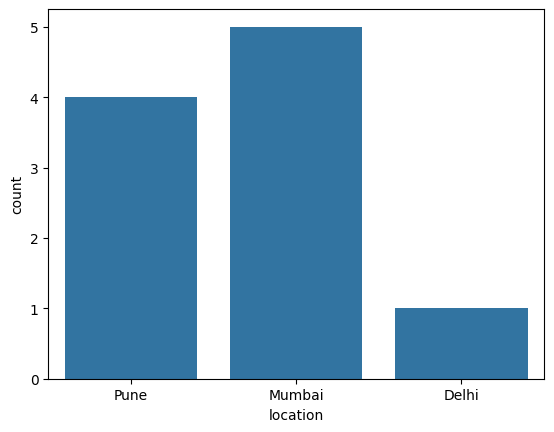

In [ ]:
sns.countplot(x="location",data=df5)

Mumbai    5
Pune      4
Delhi     1
Name: location, dtype: int64


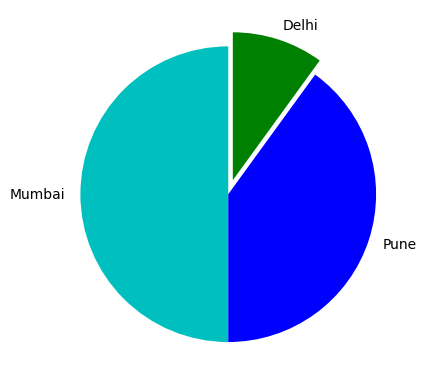

  stuid     name marks  rating       technology location techname
0     1    Rajan    98    4.50   Python Project     Pune   Python
1     2   Revati    97    3.50     Java Project     Pune     Java
2     3   mugdha    57    3.75    Java Training   Mumbai     Java
3     4    Gauri    68    4.50  Python Training   Mumbai   Python
4     5  manjiri    70    3.75    Java Training    Delhi     Java
5     6  Atharva    98    3.25     Java Project     Pune     Java
6     7     Arti    97    4.00     Java Project     Pune     Java
7     8  Prakash    57    3.75    Java Training   Mumbai     Java
8     9   sanjay    68    4.50  Python Training   Mumbai   Python
9    10   pramod    35    3.25    Java Training   Mumbai     Java


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 20:32:50 2023

@author: anilk

MAAM'S CODE
"""

import pandas as pd
s1=pd.read_excel("student.xlsx")
s2=pd.read_excel("student2.xlsx",header=None)
#assign same names to the column
s2.columns=s1.columns
rating=pd.read_excel("interviewer_rating.xlsx")
#rating.drop("rating",axis=0)
rating=rating.iloc[:,1:]
students=pd.concat([s1,s2],ignore_index=True)


#what is average rating of each student
g=rating.groupby('studentid')
for sid,data in g:
    print("Student id : ",sid)
    print(data)
    print("*"*60)

rdata=g['rating'].mean()
print(rdata)
df1=pd.DataFrame(rdata)
mergedata=pd.merge(students,df1,left_on='stuid',right_on='studentid')

#if the marks of students >80 and rating > 4 then
#allocate Python project
#if rating > 3 and marks > 90 then assign java project
#if rating>4  then assign python training
#otherwise assign java training
def myfunction(information):
    print("details",information)
    if information[0]>80 and information[1]>4:
        return 'Python Project'
    elif information[0]>90 and information[1]>3:
        return 'Java Project'
    elif information[1]>4:
        return 'Python Training'
    else:
        return 'Java Training'

mergedata['technology']=mergedata[['marks','rating']].apply(myfunction,axis=1)



#if student marks > 80 then location is pune:
#    <80 and > 70 then location is delhi
#    otherwise mumbai
def assignlocation(mks):
    if mks>80:
        return 'Pune'
    elif mks>=70:
        return 'Delhi'
    else:
        return 'Mumbai'
mergedata['location']=mergedata['marks'].apply(assignlocation)



#display  pie chart for how many students are
#allocated to mumbai, pune location and delhi location
import matplotlib.pyplot as plt
result=mergedata['location'].value_counts()
print(result)
plt.pie(result.values,labels=result.index,colors=['c','b','g'],startangle=90,explode=(0,0,0.1))
plt.show()

#minimum, max average, marks for each technology
mergedata['techname']=mergedata['technology'].map(lambda x:x.split(" ")[0])
print(mergedata)

In [3]:
#Assigment 2 Dated:  24-03-24

# Use pandas, numpy and matplotlib,seaborn
# 1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("rating11.csv")
print(df)

       userId  movieId  rating   timestamp
0           1        2     3.5  1112486027
1           1       29     3.5  1112484676
2           1       32     3.5  1112484819
3           1       47     3.5  1112484727
4           1       50     3.5  1112484580
...       ...      ...     ...         ...
58005    7120       48     4.5  1175542687
58006    7120      110     5.0  1175542038
58007    7120      141     5.0  1175542254
58008    7120      151     5.0  1175542627
58009    7120      153     0.5  1175542111

[58010 rows x 4 columns]


In [27]:
df1 = pd.read_csv("movies11.csv")
print(df1)


                                                     title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
6                                              Heat (1995)   
7                                           Sabrina (1995)   
8                                      Tom and Huck (1995)   
9                                      Sudden Death (1995)   
10                                        GoldenEye (1995)   
11                          American President, The (1995)   
12                      Dracula: Dead and Loving It (1995)   
13                                            Balto (1995)   
14                                            Nixon (1995)   
15      

In [29]:
df2 = pd.read_csv("movie12.csv", header=None)
df2.columns=df1.columns
print(df2)


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [13]:
df3 = pd.read_csv("movies13.csv", header=None, index_col = 'movieId')
df3.columns=df1.columns
print(df3)

       movieId                                              title  \
0           71                                   Fair Game (1995)   
1           72                       Kicking and Screaming (1995)   
2           73                             Misérables, Les (1995)   
3           74                                Bed of Roses (1996)   
4           75                                   Big Bully (1996)   
...        ...                                                ...   
10599    42015                                    Casanova (2005)   
10600    42018                     Mrs. Henderson Presents (2005)   
10601    42021                         White Countess, The (2005)   
10602    42053                                  Dirty Love (2005)   
10603    42094  Spirit of the Beehive, The (Espíritu de la col...   

                                      genres  
0                                     Action  
1                               Comedy|Drama  
2                             

In [26]:
#2. find all masala movie - (action ,romance,comedy,thriller)
# 3. plot a pie chart to represent genre and frequency of movie count
# 4. find average rating for each movie then merge 2 frames, display movieid,name,rating
# 5. draw pie chart for each genre and average rating
# 6. draw bar graph for each rating and number of movies

genre = ["action", "romance", "comedy", "thriller"]
movie_df = pd.concat([df1,df2, df3])
# movie_df = pd.concat([df1,df2, df3], ignore_index = True)
print(movie_df)

       movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
...        ...                                                ...   
10599    42015                                    Casanova (2005)   
10600    42018                     Mrs. Henderson Presents (2005)   
10601    42021                         White Countess, The (2005)   
10602    42053                                  Dirty Love (2005)   
10603    42094  Spirit of the Beehive, The (Espíritu de la col...   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2           